In [3]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import redes1
import redes
import ElFarolFunciones as F
import seaborn as sns

### 100 simulaciones, 100 iteraciones, 100 individuos
Red Small World, umbral  $\mu=\frac{1}{2}$

In [4]:
Num_agentes = 100
Num_iteraciones = 100
PARS = [Num_agentes, 1]
redes.small_world(Num_agentes,1)
identificador = 0
UMBRAL = 0.5
inicial = True
No_exper = 100
F.simulacion(Num_agentes,Num_iteraciones,UMBRAL,inicial,identificador,PARS)
inicial = False
for N in range(No_exper - 1):
    identificador += 1
    F.simulacion(Num_agentes,Num_iteraciones,UMBRAL,inicial,identificador,PARS)#Num_agentes = 100

[3, 3, 3, 3, 4, 3, 6, 7, 4, 6, 5, 2, 4, 4, 7, 4, 4, 4, 4, 7, 3, 6, 4, 4, 7, 3, 4, 6, 4, 6, 3, 6, 6, 6, 4, 2, 4, 7, 5, 4, 4, 3, 4, 4, 4, 4, 4, 5, 5, 5, 3, 4, 3, 3, 4, 4, 4, 3, 5, 3, 4, 2, 3, 4, 4, 2, 3, 3, 4, 5, 4, 3, 7, 3, 4, 2, 7, 3, 5, 2, 4, 4, 3, 3, 5, 4, 5, 4, 3, 2, 4, 3, 2, 5, 2, 3, 3, 3, 2, 3]


In [5]:
data = pd.read_csv('small_world.csv')
data = data[data['Identificador'] != 'Identificador']
data['Identificador'] = data['Identificador'].astype(int)
data['Estado'] = data['Estado'].astype(int)
data['Ronda'] = data['Ronda'].astype(int)
data['Agente'] = data['Agente'].astype(int)
data['Politica'] = data['Politica'].astype(int)
data['Puntaje'] = data['Puntaje'].astype(int)
#data['Estado'].unique()
df = pd.DataFrame(data.groupby(['Identificador','Ronda'])['Estado'].mean()).reset_index()
df.columns = ['Identificador','Ronda','Asistencia']
df['Asistencia'] = df['Asistencia'] * 100
df.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Identificador,Ronda,Asistencia
0,0,0,45.5
1,0,1,45.0
2,0,2,65.0
3,0,3,45.0
4,0,4,49.0


Text(0.5, 1.0, 'Asistencia a El Farol por ronda')

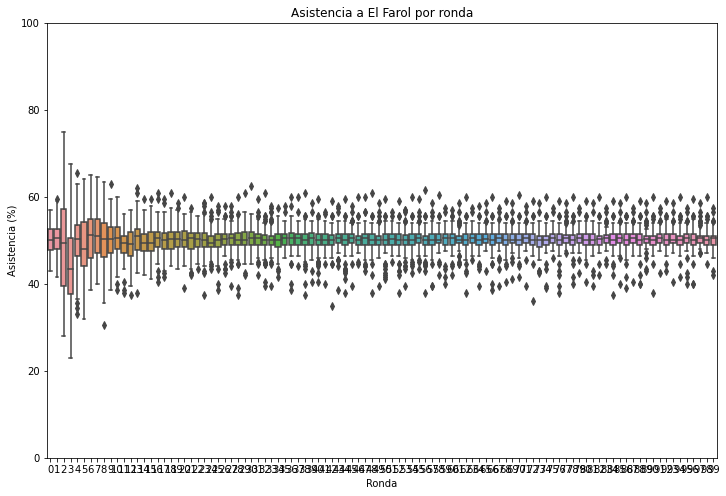

In [6]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x='Ronda',y='Asistencia',data=df)
plt.ylabel('Asistencia (%)')
plt.ylim(0,100)
plt.title('Asistencia a El Farol por ronda')

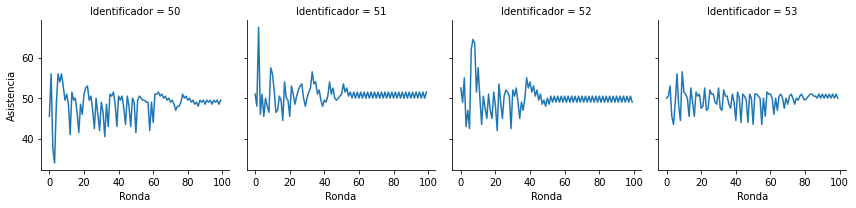

In [7]:
identificadores = list(df['Identificador'].unique())[50:54]
df2 = df[df['Identificador'].isin(identificadores)]
g = sns.FacetGrid(df2,col='Identificador')
g.map(plt.plot,'Ronda','Asistencia')

In [8]:
df = pd.DataFrame(data.groupby(['Ronda','Politica'])['Agente'].count()).reset_index()
df.columns = ['Ronda', 'Politica', 'num_agentes']
uso_politica = pd.pivot_table(
    data=df,
    index='Ronda',
    values='num_agentes',
    columns='Politica',
    aggfunc='sum'
).reset_index()
uso_politica = uso_politica.sort_values(by='Ronda',ascending=False)
uso_politica = uso_politica.set_index('Ronda')
uso_politica.head()

Politica,0,1,2,3,4,5,6,7
Ronda,,,,,,,,
99,177,811,203,5993,11146,746,80,844
98,178,828,201,5987,11130,746,82,848
97,177,839,207,5997,11119,744,82,835
96,180,830,197,6003,11122,741,81,846
95,173,827,202,6002,11124,747,82,843


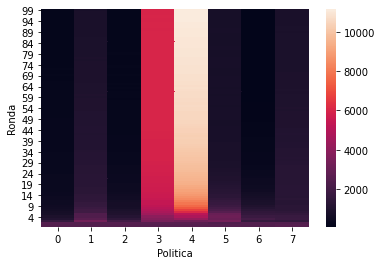

In [9]:
ax = sns.heatmap(uso_politica)